In [4]:
import math as m
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

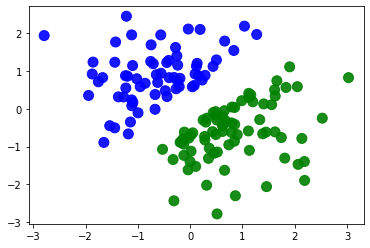

In [5]:
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])
colors = np.hstack([colors] * 20)

# LINE
def generate_line_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, Y = generate_line_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

Epoch 1/1000
1/1 [==============================] - 0s 157ms/step - loss: 0.7708
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7684
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7666
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7651
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7638
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7626
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7615
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7604
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.7594
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7585
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7575
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.7566
Epoch 13/1000
1/1 [============================

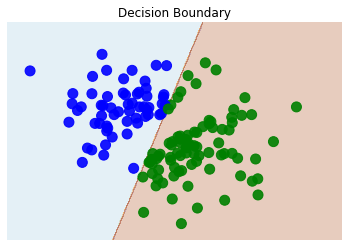

{'name': 'dense_2', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 1.5048927 ],
       [-0.43959108]], dtype=float32), array([0.03626402], dtype=float32)]


In [8]:
# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

history = model.fit(X, Y, batch_size=150, epochs=1000)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
T = model.predict(X)
T = np.array([0 if x < .5 else 1 for x in T])
T = T.reshape(X[:,0].shape)
ax.scatter(X[:, 0], X[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

for layer in model.layers:
    print(layer.get_weights())

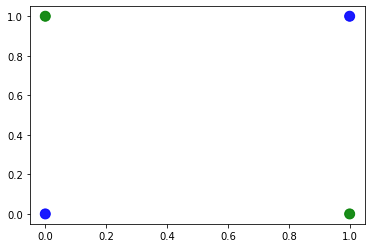

In [10]:
# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

X, Y = generate_xor_data()

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

Epoch 1/4000
1/1 [==============================] - 0s 224ms/step - loss: 0.6918
Epoch 2/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6916
Epoch 3/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6914
Epoch 4/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6913
Epoch 5/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6912
Epoch 6/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6912
Epoch 7/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6911
Epoch 8/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 9/4000
1/1 [==============================] - 0s 3ms/step - loss: 0.6910
Epoch 10/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 11/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 12/4000
1/1 [==============================] - 0s 2ms/step - loss: 0.6908
Epoch 13/4000
1/1 [============================

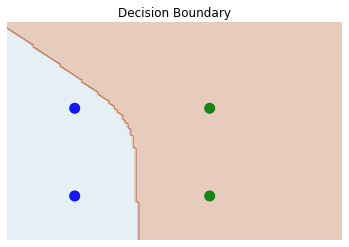

[array([[ 4.4034047, -5.210952 ],
       [-4.809561 , -4.738077 ]], dtype=float32), array([-3.489702  ,  0.82897234], dtype=float32)]
[array([[ 4.0016975],
       [-4.4197083]], dtype=float32), array([0.01534529], dtype=float32)]


In [11]:
model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

history = model.fit(X, Y, batch_size=4, epochs=4000)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
T = model.predict(X)
T = np.array([0 if x < .5 else 1 for x in T])
T = T.reshape(X[:,0].shape)
ax.scatter(X[:, 0], X[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

for layer in model.layers:
    print(layer.get_weights())

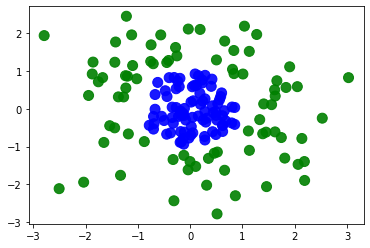

In [13]:
# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

X, Y = generate_circle_data(t)

plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

Epoch 1/2000
4/4 [==============================] - 0s 878us/step - loss: 0.6732
Epoch 2/2000
4/4 [==============================] - 0s 714us/step - loss: 0.6717
Epoch 3/2000
4/4 [==============================] - 0s 957us/step - loss: 0.6707
Epoch 4/2000
4/4 [==============================] - 0s 694us/step - loss: 0.6697
Epoch 5/2000
4/4 [==============================] - 0s 679us/step - loss: 0.6690
Epoch 6/2000
4/4 [==============================] - 0s 682us/step - loss: 0.6681
Epoch 7/2000
4/4 [==============================] - 0s 694us/step - loss: 0.6674
Epoch 8/2000
4/4 [==============================] - 0s 660us/step - loss: 0.6666
Epoch 9/2000
4/4 [==============================] - 0s 696us/step - loss: 0.6659
Epoch 10/2000
4/4 [==============================] - 0s 706us/step - loss: 0.6652
Epoch 11/2000
4/4 [==============================] - 0s 681us/step - loss: 0.6646
Epoch 12/2000
4/4 [==============================] - 0s 712us/step - loss: 0.6638
Epoch 13/2000
4/4 [======

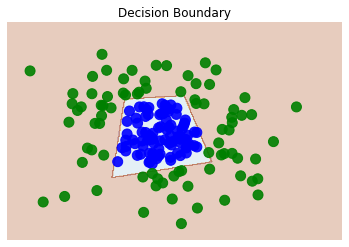

[array([[ 2.1555157, -3.0479531, -0.4134626],
       [ 2.1195617,  1.8937589,  1.8456465]], dtype=float32), array([-0.6911449, -0.4704581,  2.5467927], dtype=float32)]
[array([[ 4.442433],
       [ 3.89577 ],
       [-3.352045]], dtype=float32), array([1.5211889], dtype=float32)]


In [14]:
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

history = model.fit(X, Y, batch_size=50, epochs=2000)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
T = model.predict(X)
T = np.array([0 if x < .5 else 1 for x in T])
T = T.reshape(X[:,0].shape)
ax.scatter(X[:, 0], X[:, 1], color=colors[T].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

for layer in model.layers:
    print(layer.get_weights())